# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Как указано в документации модуля random - модуля генерации псевдослучайных чисел - random.seed(a) инициализирует генератор псевдослучайных чисел на основе параметра a, основываясь на котором затем происходит генерация "случайных" чисел. В качестве дефолтного значения используется текущий timestamp; указывая конкретное значение этого параметра, мы будем всегда получать один и тот же результат генерации "случайных" чисел`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# 1. 10 random records
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
# 2.1 first 5 records
df_test.head(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
# 2.2 last 5 records
df_test.tail(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
# 3.0 create df_train + df_test
df = pd.concat([df_train, df_test])

In [7]:
# 3.1 missing data
df[df.columns[df.isna().any()]].isna().sum()

,0
mileage,221
engine,221
max_power,215
torque,222
seats,221


In [8]:
# 4. duplicates
df.duplicated().sum()

1170

In [9]:
!pip install ydata-profiling

In [10]:
# 5. ydata-profiling
from ydata_profiling import ProfileReport

# df_train
profile_report_df_train = ProfileReport(df_train, title='Report df_train')
profile_report_df_train.to_file('df_train_ydata_profiliing_report.html')
# df_test
profile_report_df_test = ProfileReport(df_test, title='Report df_test')
profile_report_df_test.to_file('df_test_ydata_profiliing_report.html')
# df
profile_report_full = ProfileReport(df, title='Report df')
profile_report_full.to_file('df_ydata_profiliing_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
df_train[df_train.columns[df_train.isna().any()]].isna().sum()

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


In [12]:
df_test[df_test.columns[df_test.isna().any()]].isna().sum()

,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


```
1) Разберемся с mileage (202 пропуска в df_train, 19 пропусков в df_test)

Как видно значения mileage столбца имеют разные единицы измерения:
```


In [13]:
df_train['mileage'].dropna().str.replace(r'^\d+(\.\d+)?', '', regex=True).unique()

array([' kmpl', ' km/kg'], dtype=object)

```
Приведем km/kg к kmpl:
https://www.quora.com/What-is-the-weight-of-1-litre-petrol
Будем считать: 1 km/kg ~= 1.4 kmpl
```

In [14]:
def kmpkg_to_kmpl(value):
    if not pd.isna(value):
      if value.endswith('km/kg'):
          numeric_value = float(value.replace('km/kg', '').strip())
          return f'{numeric_value * 1.4} kmpl'
    return value

df_train['mileage'] = df_train['mileage'].apply(kmpkg_to_kmpl)
df_test['mileage'] = df_test['mileage'].apply(kmpkg_to_kmpl)

```
Уберем единицы измерения и приведем к float, т.к. это числовой признак по сути
```

In [15]:
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').astype(float)
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').astype(float)

In [16]:
median_mileage_train = df_train['mileage'].median()
median_mileage_train

19.33

In [17]:
df_train['mileage'] = df_train['mileage'].fillna(median_mileage_train)
df_test['mileage'] = df_test['mileage'].fillna(median_mileage_train)

```
2) Разберемся с engine (202 пропуска в df_train, 19 пропусков в df_test)

Посмотрим на единицы измерения и приведем в итоге к float, т.к. это числовой признак по сути
```

In [18]:
df['engine'].dropna().str.replace(r'^\d+(\.\d+)?', '', regex=True).unique()

array([' CC'], dtype=object)

In [19]:
df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)
df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)

```
Заполним пропуски медианным значением
```

In [20]:
median_engine_train = df_train['engine'].median()
median_engine_train

1248.0

In [21]:
df_train['engine'] = df_train['engine'].fillna(median_engine_train)
df_test['engine'] = df_test['engine'].fillna(median_engine_train)

```
3) Разберемся с max_power (196 пропуска в df_train, 19 пропусков в df_test)

Посмотрим на единицы измерения и приведем в итоге к float, т.к. это числовой признак по сути
```

In [22]:
df['max_power'].dropna().str.replace(r'^\d+(\.\d+)?', '', regex=True).unique()

array([' bhp', ''], dtype=object)

In [23]:
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '').replace('', np.nan).astype(float)
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '').replace('', np.nan).astype(float)

In [24]:
median_max_power_train = df_train['max_power'].median()
median_max_power_train

82.0

In [25]:
df_train['max_power'] = df_train['max_power'].fillna(median_max_power_train)
df_test['max_power'] = df_test['max_power'].fillna(median_max_power_train)

```
4) torque обрабатывать не будем, так как мы его удалим в будущем
```

```
5) Разберемся с seats (202 пропуска в df_train, 19 пропусков в df_test)
```

In [26]:
median_seats_train = df_train['seats'].median()
median_seats_train

5.0

In [27]:
df_train['seats'] = df_train['seats'].fillna(median_seats_train)
df_test['seats'] = df_test['seats'].fillna(median_seats_train)

In [28]:
# missing data
df_train[df_train.columns[df_train.isna().any()]].isna().sum()

,0
torque,203


In [29]:
df_test[df_test.columns[df_test.isna().any()]].isna().sum()

,0
torque,19


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [30]:
# df_train without selling_price duplicates
df_train.drop(['selling_price'], axis=1).duplicated().sum()

1159

In [31]:
# show df_train duplicates
df_train_without_selling_price = df_train.drop(['selling_price'], axis=1)
df_train_without_selling_price[df_train_without_selling_price.duplicated(keep=False)].sort_values(by='name')

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [32]:
# drop duplicates
df_train = df_train.drop_duplicates(subset=df_train_without_selling_price.columns, keep='first')

In [33]:
# reset index
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [34]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [35]:
# delete torque
df_train = df_train.drop(['torque'], axis=1)
df_test = df_test.drop(['torque'], axis=1)

In [36]:
df_train[['mileage', 'engine', 'max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,23.00,1396.0,90.00
3,16.10,1298.0,88.20
4,20.14,1197.0,81.86
...,...,...,...
5835,17.92,1086.0,62.10
5836,18.90,998.0,67.10
5837,18.50,1197.0,82.85
5838,16.80,1493.0,110.00


In [37]:
df_test[['mileage', 'engine', 'max_power']]

,mileage,engine,max_power
0,14.00,2498.0,112.00
1,21.50,1497.0,108.50
2,12.90,1799.0,130.00
3,25.10,1498.0,98.60
4,16.50,1172.0,65.00
...,...,...,...
995,19.81,1086.0,68.05
996,18.60,1197.0,81.83
997,23.00,1396.0,90.00
998,20.36,1197.0,78.90


In [38]:
df_train[['mileage', 'engine', 'max_power']].dtypes

,0
mileage,float64
engine,float64
max_power,float64


In [39]:
df_test[['mileage', 'engine', 'max_power']].dtypes

,0
mileage,float64
engine,float64
max_power,float64


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [40]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [41]:
df_train[['engine', 'seats']].dtypes

,0
engine,int64
seats,int64


In [42]:
df_test[['engine', 'seats']].dtypes

,0
engine,int64
seats,int64


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [43]:
# df_train numeric data statistics
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.544906,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.228385,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.330000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,14.000000


In [44]:
# df_test numeric data statistics
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.412846,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,4.090369,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.587500,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,45.164000,3604.00000,280.000000,9.000000


In [45]:
# df_train categorical data statistics
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [46]:
# df_test categorical data statistics
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [47]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

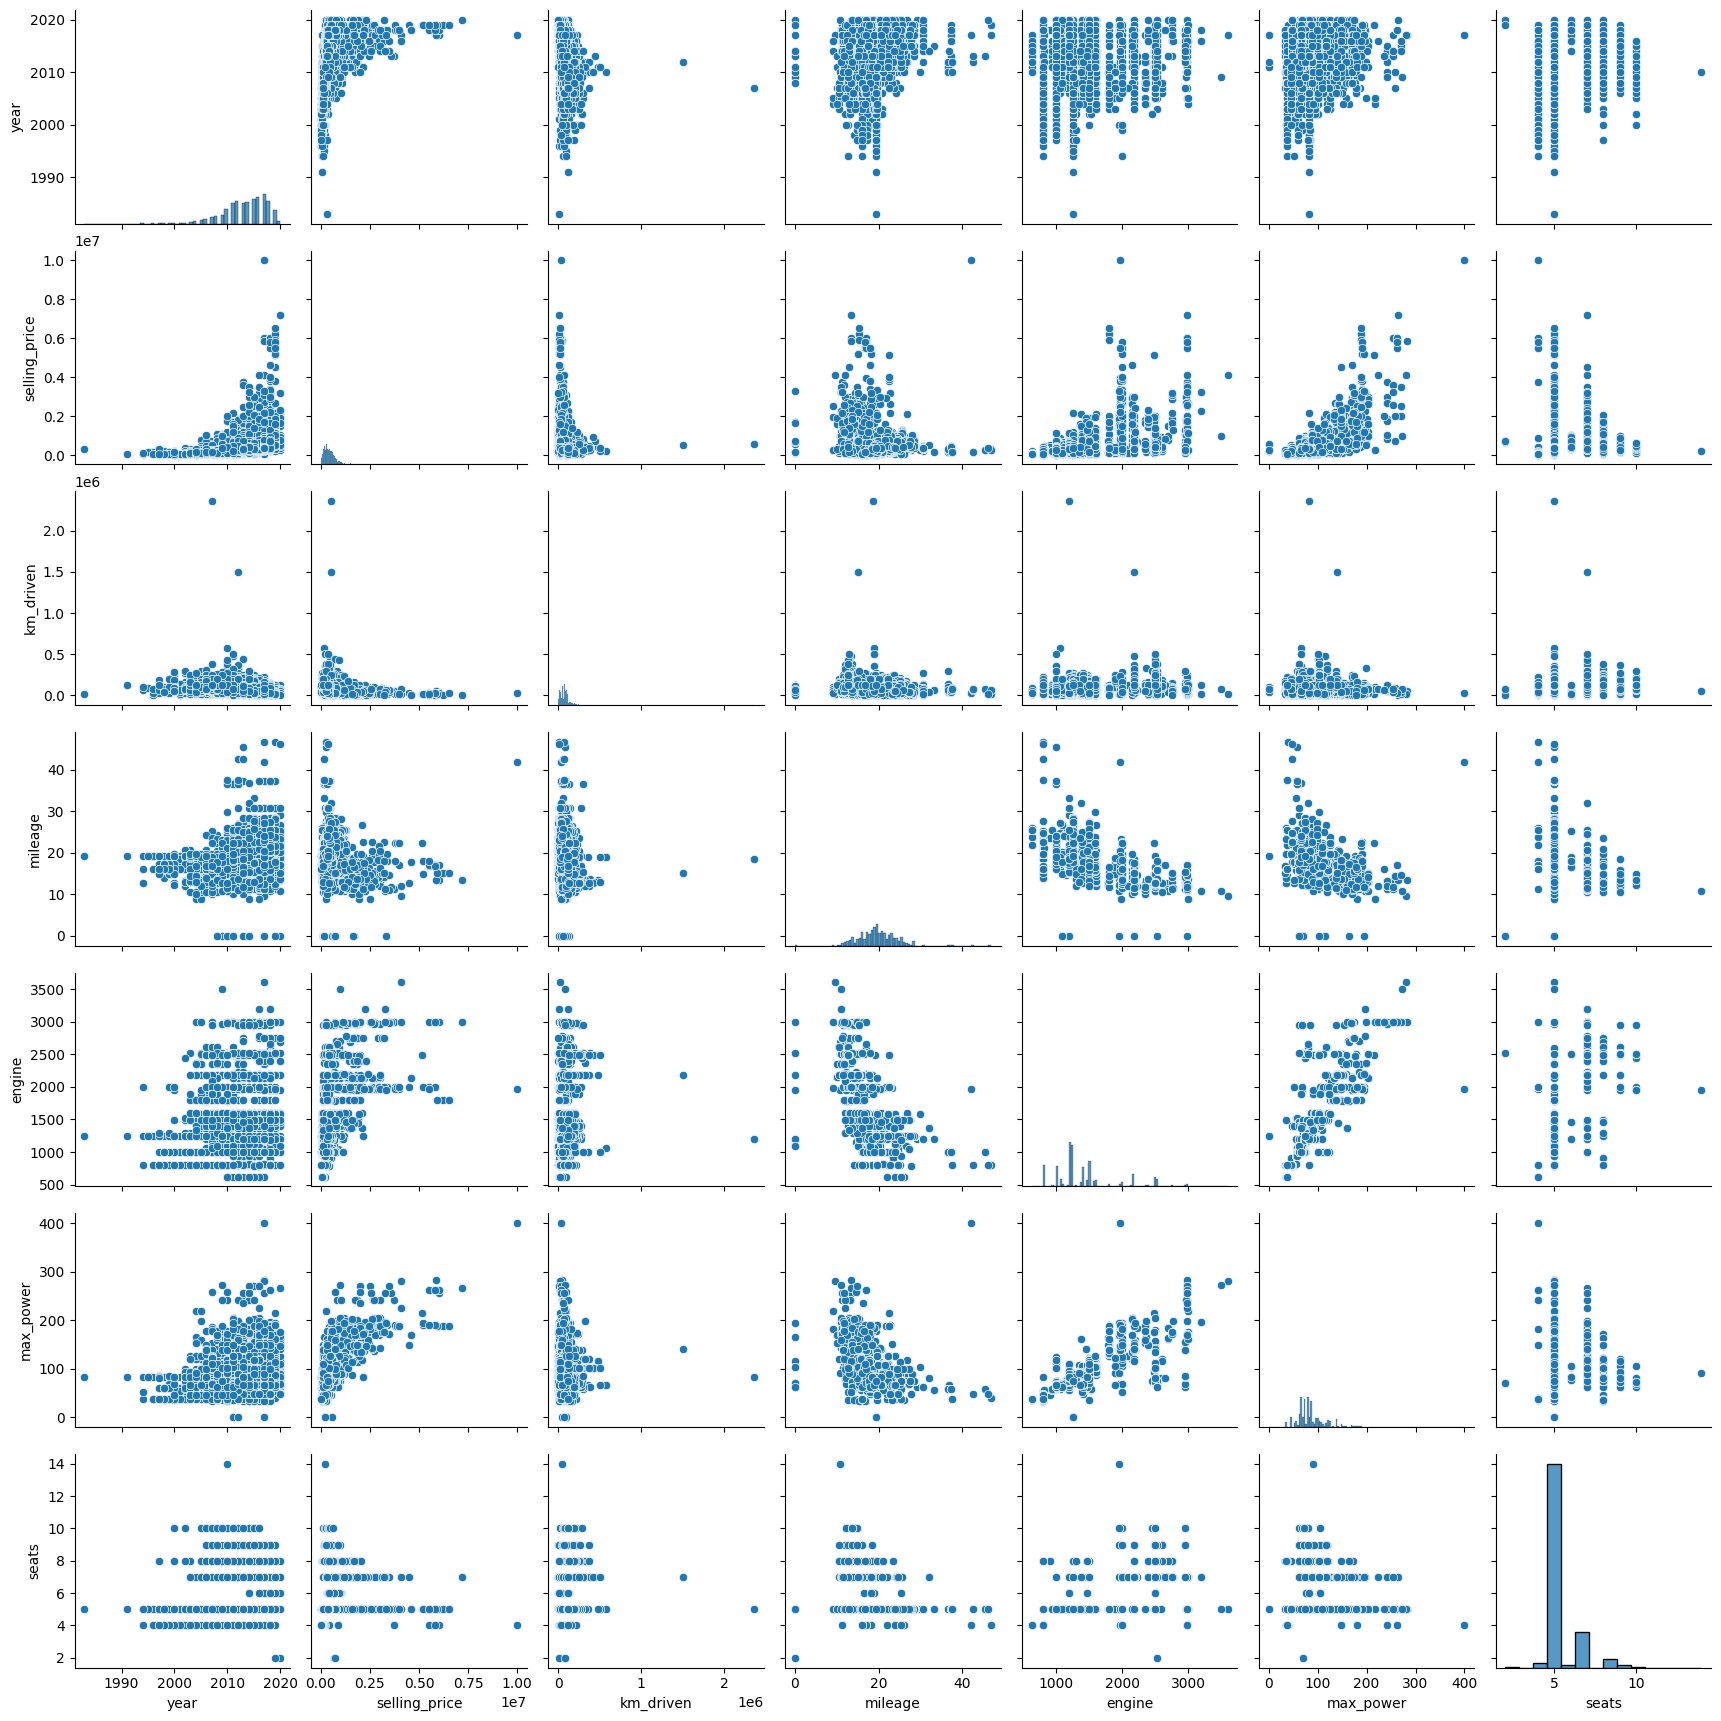

In [48]:
# df_train pairplot
sns.pairplot(df_train)
plt.show()

```
Можно ли предположить на основе распределений связь признаков с целевой переменной?
Да, можно. У нас есть графики зависимости признаков с целовой переменной, отсюда можно сделать соответствующие выводы. Например, если увидим, что точки +- располагаются вдоль прямой, то это явная линенйная связь.



Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Да, можно. У нас есть попарные графики зависимости признаков, отсюда можно выдвинуть гипотезы о наличии или отсутствии корреляции тех или иных признаков. Например, если точки разбросаны без явной структуры, то, вероятно, корреляции нет.
```

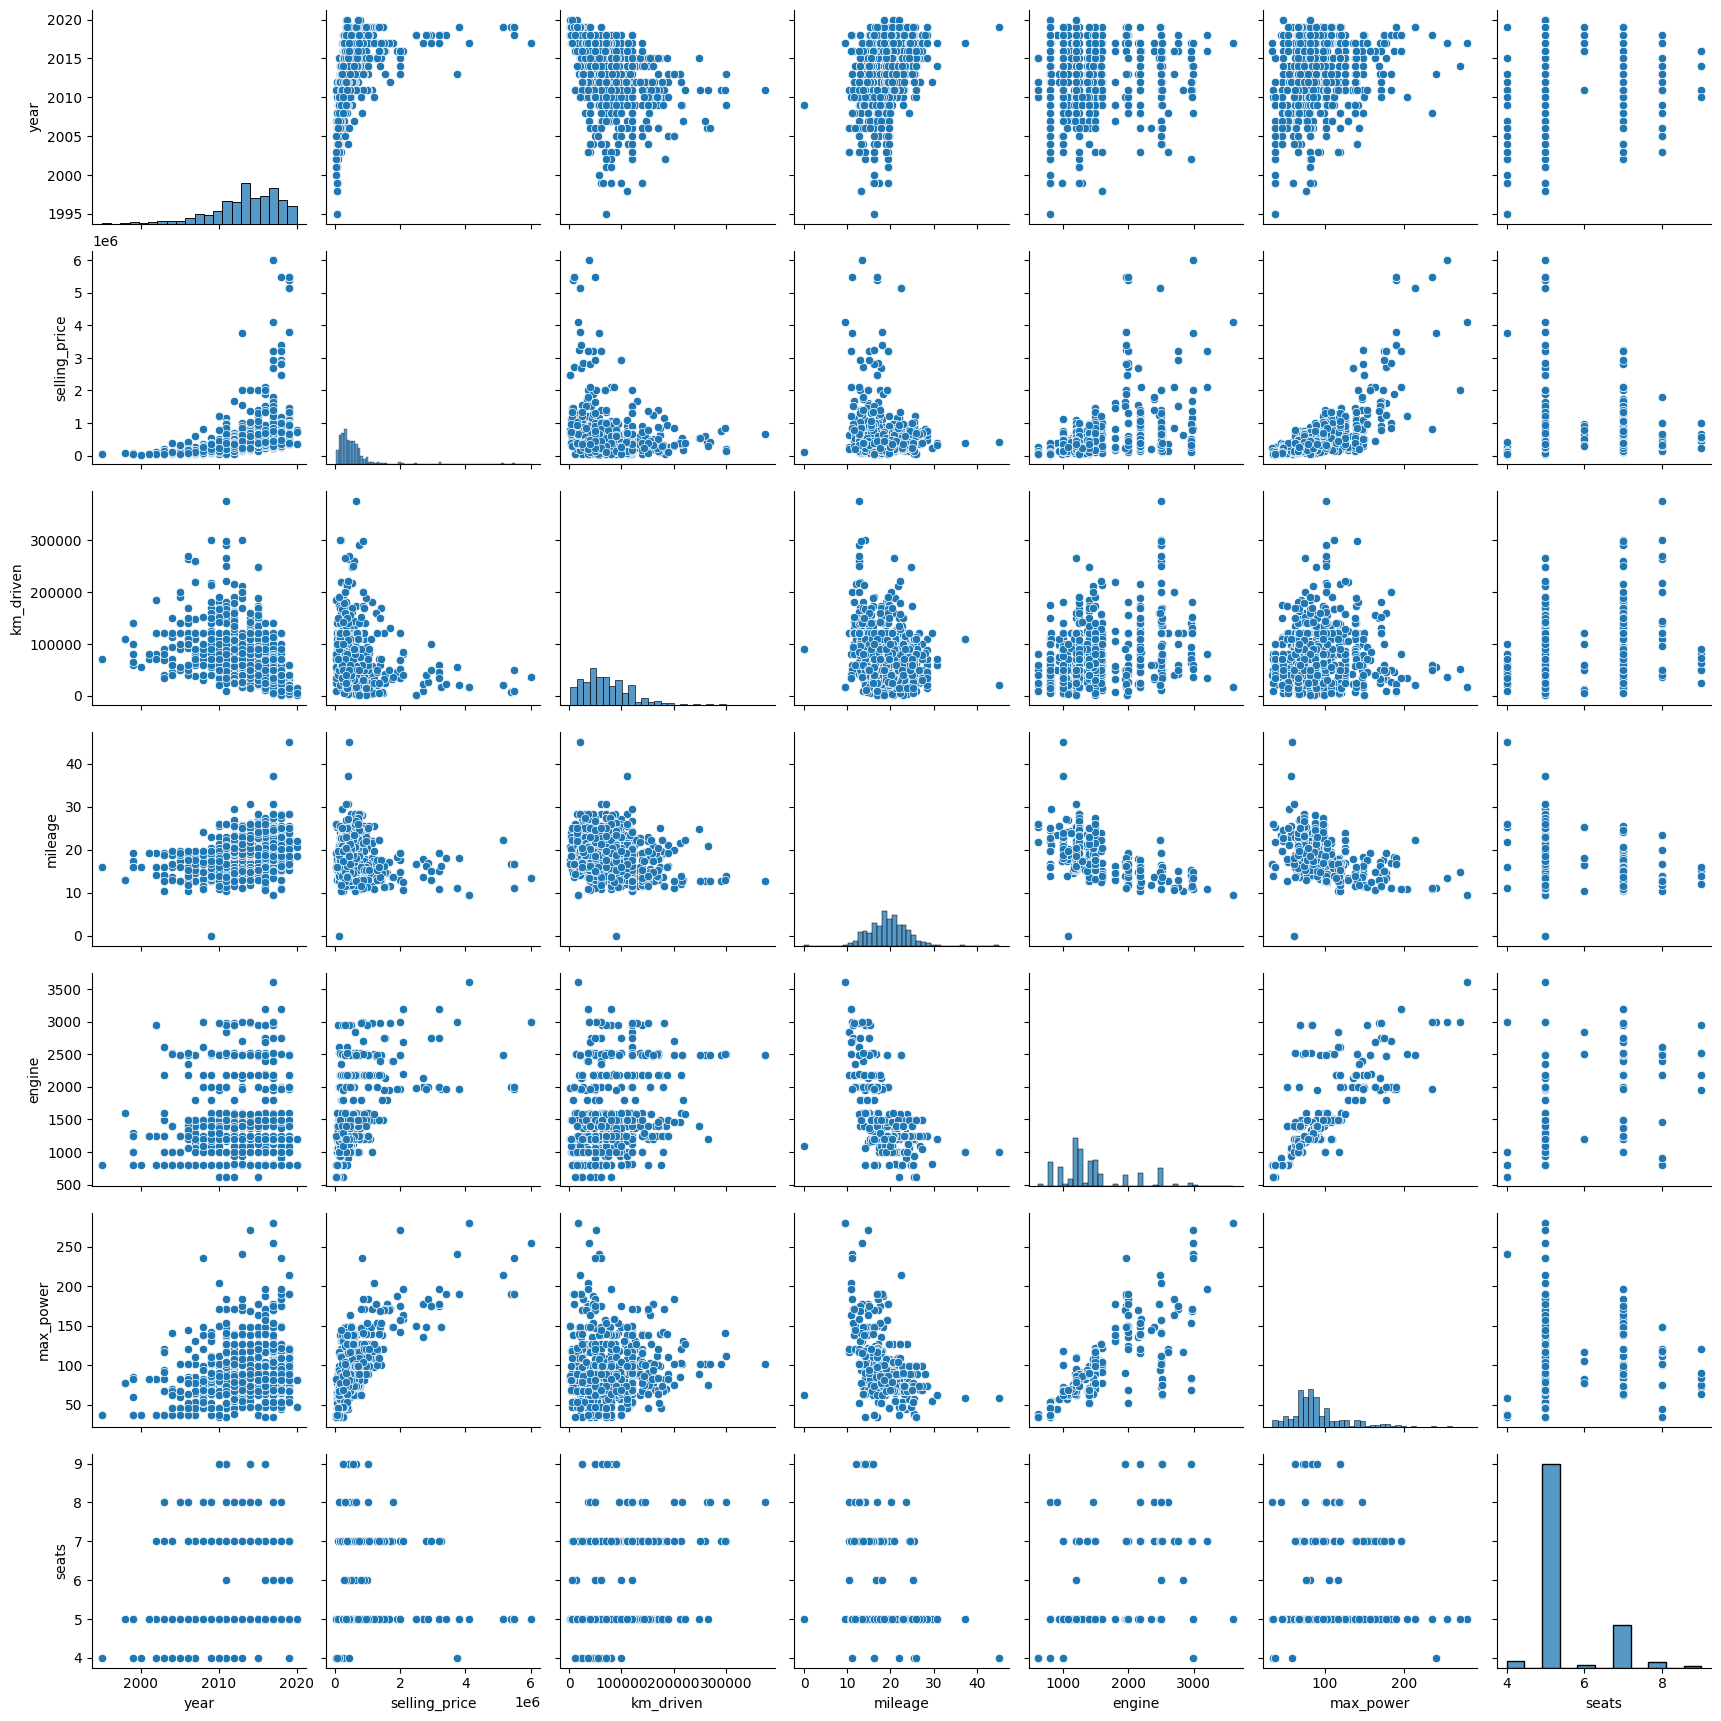

In [49]:
# df_test pairplot
sns.pairplot(df_test)
plt.show()

```
Похожими ли оказались совокупности при разделении на трейн и тест?

Да, визуально похожи
```

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [50]:
# df_train correlaction matrix
matrix_corr_train = df_train.select_dtypes(include='number').corr()

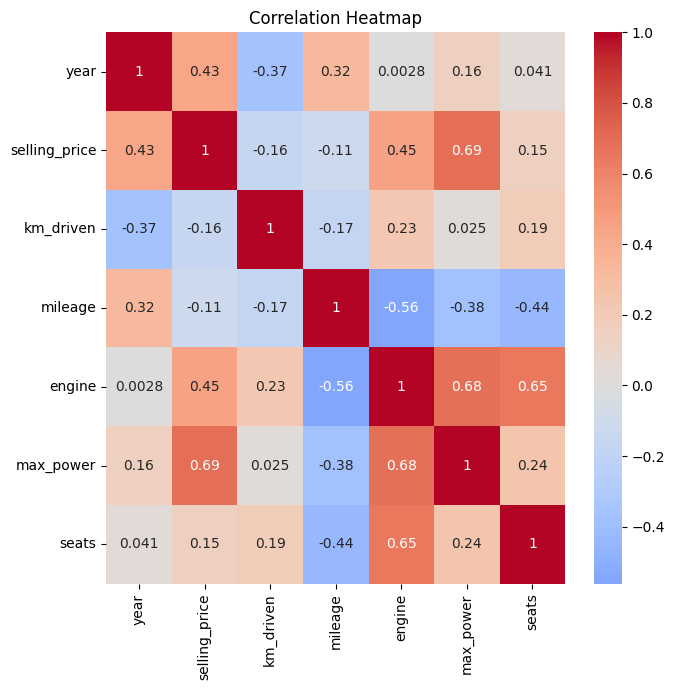

In [51]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix_corr_train, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

```
- Какие 2 признака наименее скоррелированы между собой?
наименьшее значение корреляции между признаками year и engine (0.0028)

- Между какими наблюдается довольно сильная положительная линейная зависимость?
 * engine и max_power (0.68)
 * engine и seats (0.65)

 * selling_price и max_power (0.69), но selling_price - это целевая переменная

- Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Нет, не правильно.  Значение корреляции (0.34) означает слабую линейную связь.
То есть это не значит, что каждый более старый автомобиль будет обязательно иметь больший пробег

```

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

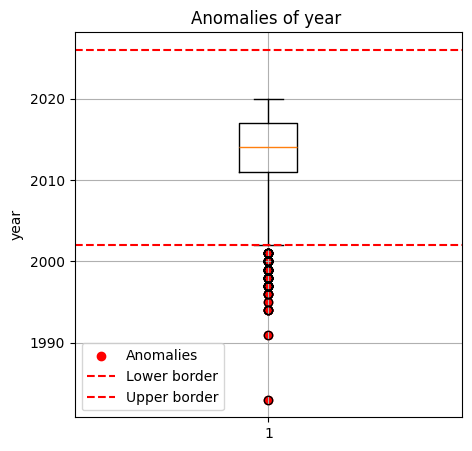

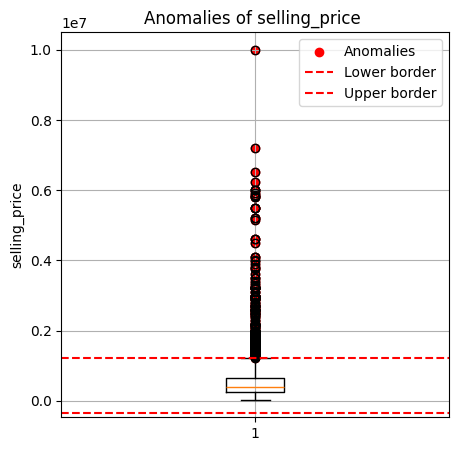

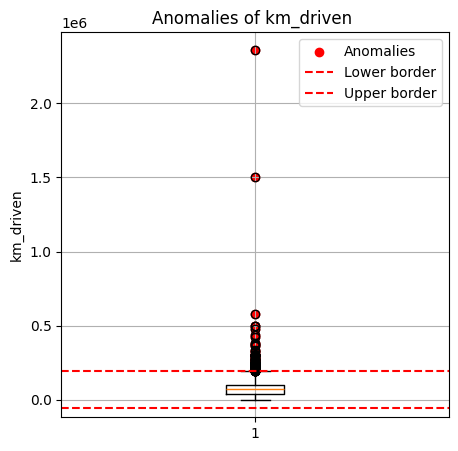

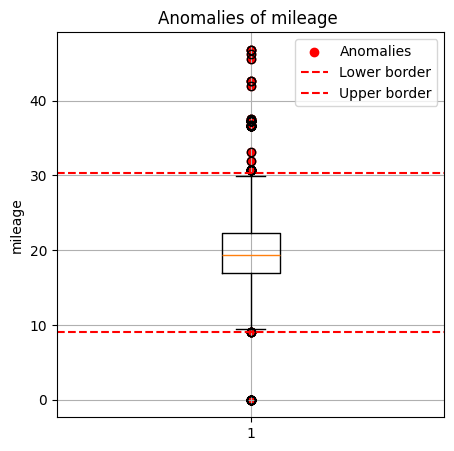

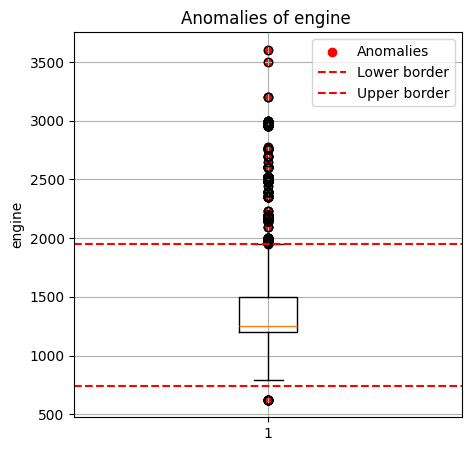

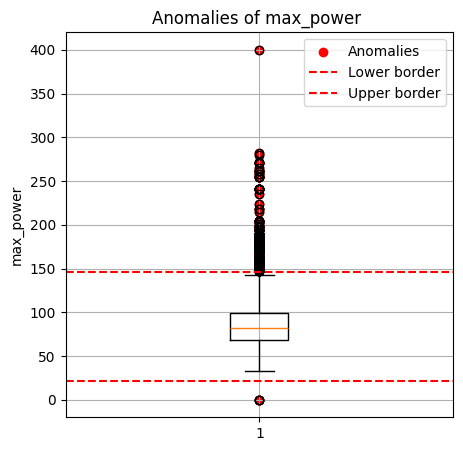

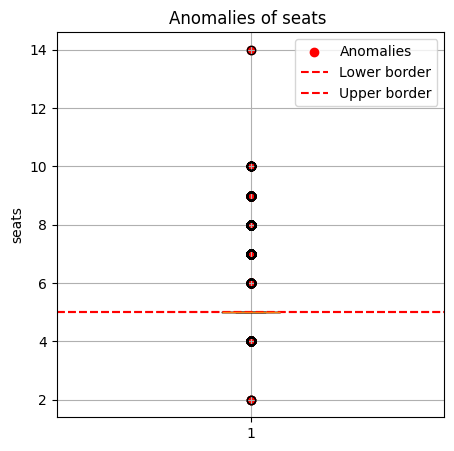

In [52]:
def IQR_anomoalies(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  bound_lower = Q1 - 1.5 * IQR
  bound_upper = Q3 + 1.5 * IQR
  return df[(df[column] <  bound_lower) | (df[column] > bound_upper)], bound_lower, bound_upper


def plot_IQR_boxplot(df, column):
    anomalies, bound_lower, bound_upper = IQR_anomoalies(df, column)

    plt.figure(figsize=(5, 5))
    plt.boxplot(df[column])
    plt.scatter([1]*len(anomalies), anomalies[column] , color='red', label='Anomalies')
    plt.title(f'Anomalies of {column} ')
    plt.ylabel(column)
    plt.axhline(bound_lower, color='red', linestyle='--', label='Lower border')
    plt.axhline(bound_upper, color='red', linestyle='--', label='Upper border')
    plt.legend()
    plt.grid(True)
    plt.show()

for col in list(df_train.select_dtypes(include='number').columns):
    plot_IQR_boxplot(df_train, col)

```
Построили диаграммы выбросов для числовых признаков, из которых можно видеть, что данные имеют довольно сильный разброс, что в целом будет плохо сказываться на наивной модели линейной регрессии (т.к. используется МНК, который не устойчив к выбросам)
```

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [53]:
target = 'selling_price'

y_train = df_train[target]
X_train = df_train.select_dtypes(include='number').drop(target, axis=1)

In [54]:
assert X_train.shape == (5840, 6)

In [55]:
y_test = df_test[target]
X_test = df_test.select_dtypes(include='number').drop(target, axis=1)

In [56]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)

LinearRegression()

In [58]:
pred_train_1 = model_lr_1.predict(X_train)
print(r2_score(y_train, pred_train_1))
print(MSE(y_train, pred_train_1))

0.5923583203410302
116845733702.86499


In [59]:
pred_test_1 = model_lr_1.predict(X_test)
print(r2_score(y_test, pred_test_1))
print(MSE(y_test, pred_test_1))

0.5944005754723716
233150131369.0009


```
Выводы: модель имеет достаточно не высокую точность прогноза

```

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns)
    ]
)


model_lr_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_lr_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [61]:
pred_train_2 = model_lr_2.predict(X_train)
print(r2_score(y_train, pred_train_2))
print(MSE(y_train, pred_train_2))

0.5923583203410294
116845733702.8652


In [62]:
pred_test_2 = model_lr_2.predict(X_test)
print(r2_score(y_test, pred_test_2))
print(MSE(y_test, pred_test_2))

0.5944005754723818
233150131368.99503


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [63]:
# most informative feature
model_lr_2_coeffs = pd.Series(model_lr_2.named_steps['regressor'].coef_, index=X_train.columns)
model_lr_2_coeffs.abs().sort_values(ascending=False).head(1)

,0
max_power,323161.225864


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns)
    ]
)


model_lr_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

model_lr_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                ('regressor', Lasso())])

In [65]:
pred_train_3 = model_lr_3.predict(X_train)
print(r2_score(y_train, pred_train_3))
print(MSE(y_train, pred_train_3))

0.5923583203058203
116845733712.95749


In [66]:
pred_test_3 = model_lr_3.predict(X_test)
print(r2_score(y_test, pred_test_3))
print(MSE(y_test, pred_test_3))

0.594399392295899
233150811492.6237


In [67]:
model_lr_3.named_steps['regressor'].coef_

array([153264.27474451, -44147.55242207,  28969.50331731,  60833.96196385,
       323162.11890202, -23429.61544362])

```
Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

Предположение:
L1-регуляризация с параметрами по умолчанию (аlpha=1.0) не занулила никакие веса, потому что нет переобучения модели,
все признаки достаточно сильно коррелируют с целевой переменной
```

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns)
    ]
)

model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

param_grid={
    'regressor__alpha': np.logspace(-5, 5, 20)
}

grid_search_1 = GridSearchCV(model_lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [69]:
# number of models fitted
len(grid_search_1.cv_results_['mean_test_score']) * 10

200

In [70]:
best_lasso = grid_search_1.best_estimator_
print(f"Best alpha: {grid_search_1.best_params_}")
print(f"Best MSE: {-grid_search_1.best_score_}")

Best alpha: {'regressor__alpha': 784.7599703514607}
Best MSE: 121254543412.9244


```
Никакие из весов не занулились
```

In [71]:
best_lasso.named_steps['regressor'].coef_

array([153056.80274034, -43287.04444006,  27579.20584429,  57164.305953  ,
       323816.84400308, -21176.54286155])

In [72]:
pred_train_4 = best_lasso.predict(X_train)
print(r2_score(y_train, pred_train_4))
print(MSE(y_train, pred_train_4))

0.5923372690135547
116851767820.3928


In [73]:
pred_test_4 = best_lasso.predict(X_test)
print(r2_score(y_test, pred_test_4))
print(MSE(y_test, pred_test_4))

0.5934670827639144
233686729634.3023


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline


numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns)
    ]
)

model_elastic_net = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

param_grid={
    'regressor__alpha': np.logspace(-6, 2, 10),
    'regressor__l1_ratio': np.linspace(0, 1, 11)
}

grid_search_2 = GridSearchCV(model_elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                                       ('regressor', ElasticNet())]),
             param_grid={'regressor__alpha': array([1.00000000e-06, 7.74263683e-06, 5.99484250e-05, 4.64158883e-04,
       3.59381366e-03, 2.78255940e-02, 2.15443469e-01, 1.66810054e+00,
       1.29154967e+01, 1.00000000e+02]),
                         'regressor__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [75]:
# number of models fitted
len(grid_search_2.cv_results_['mean_test_score']) * 10

1100

In [76]:
best_en = grid_search_2.best_estimator_
print(f"Best params: {grid_search_2.best_params_}")
print(f"Best MSE: {-grid_search_2.best_score_}")

Best params: {'regressor__alpha': 0.02782559402207126, 'regressor__l1_ratio': 0.5}
Best MSE: 121228603189.25876


In [77]:
pred_train_5 = best_en.predict(X_train)
print(r2_score(y_train, pred_train_5))
print(MSE(y_train, pred_train_5))

0.5922549686940588
116875358247.21944


In [78]:
pred_test_5 = best_en.predict(X_test)
print(r2_score(y_test, pred_test_5))
print(MSE(y_test, pred_test_5))

0.5913329159972485
234913509634.27646


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [79]:
X_train_cat = df_train.copy()
y_train_cat = df_train[target]
X_test_cat = df_test.copy()
y_test_cat = df_test[target]

In [80]:
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split(' ')[0])
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.split(' ')[0])

In [81]:
print('X_train_cat name unique: ', X_train_cat['name'].unique())
print('X_test_cat name unique: ', X_test_cat['name'].unique())

X_train_cat name unique:  ['Maruti' 'Skoda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra' 'Honda'
 'Chevrolet' 'Fiat' 'Datsun' 'Tata' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Isuzu' 'Peugeot']
X_test_cat name unique:  ['Mahindra' 'Tata' 'Honda' 'Chevrolet' 'Maruti' 'Hyundai' 'Lexus' 'Ford'
 'Jeep' 'Renault' 'Toyota' 'Skoda' 'BMW' 'Datsun' 'Volvo' 'Nissan'
 'Volkswagen' 'Ambassador' 'Jaguar' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Opel' 'Fiat' 'Ashok']


In [82]:
target = 'selling_price'

X_train_cat = X_train_cat.drop([target], axis=1)
X_test_cat = X_test_cat.drop([target], axis=1)

In [83]:
assert X_train_cat.shape == (5840, 11)

In [84]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


In [85]:
X_test_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,25,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,290,534,837,877,623


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = list(X_train_cat.select_dtypes(include=['number']).drop(['seats'], axis=1).columns)
categorical_features = list(X_train_cat.select_dtypes(include=['object']).columns) + ['seats']


categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# X_train_processed = preprocessor.fit_transform(X_train_cat)
# X_test_processed = preprocessor.transform(X_test_cat)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid={
    'regressor__alpha': [10**i for i in range(-6, 7)]
}

grid_search_3 = GridSearchCV(model_ridge, param_grid, cv=10, scoring='r2')
grid_search_3.fit(X_train_cat, y_train_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'km_driven',
                                                                          'mileage',
                                                                          'engine',
                                                                          'max_power']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['name',
                                                                          'fuel',
                                                                          'seller_type',
                                                                          'transmission',
                                                                          'owner',
                                                                          'seats'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100, 1000, 10000,
                                              100000, 1000000]},
             scoring='r2')

In [88]:
best_ridge = grid_search_3.best_estimator_
print(f"Best alpha: {grid_search_3.best_params_}")
print(f"Best R2: {grid_search_3.best_score_}")

Best alpha: {'regressor__alpha': 1}
Best R2: 0.710490004408048


In [89]:
pred_train_6 = best_ridge.predict(X_train_cat)
print(r2_score(y_train_cat, pred_train_6))
print(MSE(y_train_cat, pred_train_6))

0.77070803765658
65723867084.937004


In [90]:
pred_test_6 = best_ridge.predict(X_test_cat)
print(r2_score(y_test_cat, pred_test_6))
print(MSE(y_test_cat, pred_test_6))

0.7806501298930574
126088569013.05421


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


```
Удалось ли улучшить качество прогнозов?
Да, удалось

Самый весомый вклад внесло использование признака name
```

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [91]:
def business_metric(y_true, y_pred):
    percentage_error = np.abs((y_pred - y_true) / y_true)
    return np.sum(percentage_error <= 0.1) / len(y_true)

In [92]:
target = 'selling_price'

y_train_numeric = df_train[target]
X_train_numeric = df_train.select_dtypes(include='number').drop(target, axis=1)

X_test_numeric = df_test.select_dtypes(include='number').drop(target, axis=1)
y_test_numeric = df_test[target]

In [93]:
# naive linear regression fitted only on numeric data
model_lr_1_pred_test_numeric = model_lr_1.predict(X_test_numeric)
business_metric(y_test_numeric, model_lr_1_pred_test_numeric)

0.225

In [94]:
# naive linear regression fitted only on numeric standartised data
model_lr_2_pred_test_numeric = model_lr_2.predict(X_test_numeric)
business_metric(y_test_numeric, model_lr_2_pred_test_numeric)

0.225

In [95]:
# Lasso (alpha=1) fitted only on numeric standartised data
model_lr_3_pred_test_numeric = model_lr_3.predict(X_test_numeric)
business_metric(y_test_numeric, model_lr_3_pred_test_numeric)

0.225

In [96]:
# Best Lasso fitted only on numeric standartised data
model_lr_4_pred_test_numeric = best_lasso.predict(X_test_numeric)
business_metric(y_test_numeric, model_lr_4_pred_test_numeric)

0.223

In [97]:
# Best ElasticNet fitted only on numeric standartised data
model_lr_5_pred_test_numeric = best_en.predict(X_test_numeric)
business_metric(y_test_numeric, model_lr_5_pred_test_numeric)

0.223

In [98]:
# Best Ridge fitted on numeric and categorical data
model_lr_6_pred_test_numeric = best_ridge.predict(X_test_cat)
business_metric(y_test_cat, model_lr_6_pred_test_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.311

```
Лучше всех справилась модель Ridge обученная на числовых и закодированных категориальных данных
```

```
Обучим лучшую модель на всех данных и сохраним в pickle
```

In [99]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df = pd.concat([df_train, df_test])


df['mileage'] = df['mileage'].apply(kmpkg_to_kmpl)
df['mileage'] = df['mileage'].str.replace(' kmpl', '').astype(float)
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['engine'] = df['engine'].fillna(df['engine'].median())

df['max_power'] = df['max_power'].str.replace(' bhp', '').replace('', np.nan).astype(float)
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

df['seats'] = df['seats'].fillna(df['seats'].median())

df['engine'] = df['engine'].astype(int)
df['seats'] = df['seats'].astype(int)

df = df.drop(['torque'], axis=1)

df_without_selling_price = df.drop(['selling_price'], axis=1)
df = df.drop_duplicates(subset=df_without_selling_price.columns, keep='first')

df['name'] = df['name'].apply(lambda x: x.split(' ')[0])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6608 non-null   object 
 1   year           6608 non-null   int64  
 2   selling_price  6608 non-null   int64  
 3   km_driven      6608 non-null   int64  
 4   fuel           6608 non-null   object 
 5   seller_type    6608 non-null   object 
 6   transmission   6608 non-null   object 
 7   owner          6608 non-null   object 
 8   mileage        6608 non-null   float64
 9   engine         6608 non-null   int64  
 10  max_power      6608 non-null   float64
 11  seats          6608 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 619.6+ KB


In [100]:
X_full = df.drop(['selling_price'], axis=1)
y_full = df['selling_price']

In [101]:
numerical_features = list(X_full.select_dtypes(include=['number']).drop(['seats'], axis=1).columns)
categorical_features = list(X_full.select_dtypes(include=['object']).columns) + ['seats']


categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid={
    'regressor__alpha': [10**i for i in range(-6, 7)]
}

grid_search = GridSearchCV(model_ridge, param_grid, cv=10, scoring='r2')
grid_search.fit(X_full, y_full)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'km_driven',
                                                                          'mileage',
                                                                          'engine',
                                                                          'max_power']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['name',
                                                                          'fuel',
                                                                          'seller_type',
                                                                          'transmission',
                                                                          'owner',
                                                                          'seats'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100, 1000, 10000,
                                              100000, 1000000]},
             scoring='r2')

In [102]:
best_ridge = grid_search.best_estimator_
print(f"Best alpha: {grid_search.best_params_}")
print(f"Best R2: {grid_search.best_score_}")

Best alpha: {'regressor__alpha': 1}
Best R2: 0.7138593373674468


In [103]:
pred_train_full = best_ridge.predict(X_full)
print(r2_score(y_full, pred_train_full))
print(MSE(y_full, pred_train_full))

0.7652852946991416
64660086009.74151


In [104]:
import joblib

joblib.dump(best_ridge, 'car_price_prediction_pipeline.pkl')

['car_price_prediction_pipeline.pkl']

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



🤞 Сабрина Садиех	@sabrina_sadiekh